In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras import datasets ,layers ,models
from tensorflow import keras

In [43]:
# Data loading
(X_train , y_train) ,(X_test, y_test) = datasets.cifar10.load_data() 

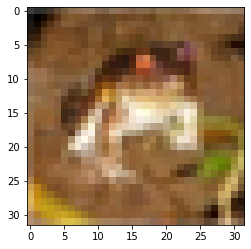

In [44]:
X_train.shape
# train sameple :50k , each sample is 32 *32 , 3 is RGB channel


X_test.shape


plt.imshow(X_train[0]) # view images 

###################### reshapping
y_train[:5]
y_train.shape
y_train = y_train.reshape(-1,)

#Similarly for y_test
y_test[:5]
y_test= y_test.reshape(-1,)

# Scaling 0-255
X_train = X_train/255.0
X_test = X_test /255.0



#Sigmoid  gives probab as op  0.4 0.67  that added together doesnt equals 100 
# Softmax --- //  ---  0.45 0.59 such that  a+b =100  cuz a/a+b   b/a+b

In [45]:
def build_model(hp):  
  model = keras.Sequential([
                         
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
        
    ),
    keras.layers.MaxPooling2D((2,2)),

   
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
     keras.layers.MaxPooling2D((2,2)),
     
   
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [11]:
!pip install keras-tuner  


     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=8a07876c9c005ba600ffc6bbd0cb537303b10eab09ded2255717d8cbadfe79d5
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=86e119c1e1673073bd28feb92bb9ebfcd47b18a5319540842dbf1573a3e1f82b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [46]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [49]:
tuner=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=2,directory='output',project_name="CIFAR102")


In [50]:
# model.fit(X_Train ,y_train)
tuner.search(X_train,y_train,epochs=10,validation_split=0.2)

Trial 2 Complete [00h 00m 42s]
val_accuracy: 0.10159999877214432

Best val_accuracy So Far: 0.6940000057220459
Total elapsed time: 00h 01m 20s
INFO:tensorflow:Oracle triggered exit


In [56]:
model=tuner.get_best_models(num_models=1)[0]

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 112)       8512      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        32288     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 112)               129136    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [54]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5980 - accuracy: 0.7882 - val_loss: 1.0461 - val_accuracy: 0.6780
Epoch 2/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5815 - accuracy: 0.7948 - val_loss: 1.0518 - val_accuracy: 0.6736
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5605 - accuracy: 0.8009 - val_loss: 1.1262 - val_accuracy: 0.6632
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5464 - accuracy: 0.8065 - val_loss: 1.0830 - val_accuracy: 0.6814
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5281 - accuracy: 0.8125 - val_loss: 1.1250 - val_accuracy: 0.6794
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5107 - accuracy: 0.8181 - val_loss: 1.1437 - val_accuracy: 0.6740
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4980 - accuracy: 0.8224 - val_loss: 1.1543 - val_accuracy:

In [55]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3142 - accuracy: 0.6509


[1.3141793012619019, 0.6509000062942505]

In [57]:
#Predictions
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.4131597e-03, 2.2823145e-04, 1.4707287e-03, 8.3508086e-01,
        1.0603606e-03, 1.4300007e-01, 9.9072643e-03, 1.2444162e-04,
        4.2961524e-03, 3.4187557e-03],
       [7.0423289e-04, 2.7748493e-03, 1.1281112e-06, 3.6521326e-06,
        2.7409664e-08, 1.8240289e-08, 1.5603761e-09, 1.0564056e-09,
        9.9644768e-01, 6.8433721e-05],
       [3.6731906e-02, 1.5845372e-01, 2.4569759e-03, 7.2193639e-03,
        9.6677366e-04, 5.6994136e-04, 1.6018636e-04, 6.3434651e-04,
        7.7874982e-01, 1.4056934e-02],
       [7.6567692e-01, 9.6921541e-02, 4.0930664e-04, 3.7546307e-04,
        2.2265294e-03, 2.3933406e-05, 5.5426663e-05, 3.5805668e-05,
        1.3355653e-01, 7.1846589e-04],
       [3.6333377e-06, 1.1394995e-05, 8.5724415e-03, 4.7458028e-03,
        7.1289200e-01, 1.6079301e-03, 2.7215001e-01, 5.2621099e-06,
        1.1078609e-05, 4.2262468e-07]], dtype=float32)

In [58]:
#Comparing Actual and pred
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [60]:
# Plotting samples images to observe Actual to Pred

orig_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(orig_classes[y[index]])

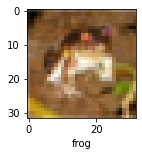

In [61]:
plot_sample(X_train, y_train, 0)

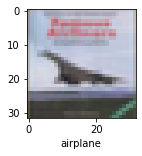

In [69]:
# Actual
plot_sample(X_test, y_test, 3)

In [68]:
orig_classes[y_classes[3]]

'airplane'